# **Abstract**

---


Este estudio presenta el análisis de un dataset de CoinMarketCap.com que comprende datos detallados sobre varias criptomonedas, cubriendo el período de 2013 a 2021. El dataset incluye información crucial como precios, volúmenes de comercio, capitalización de mercado y otros indicadores financieros y técnicos.

El dataset contiene registros diarios de precios de cierre, apertura, máximos y mínimos, volúmenes de comercio y capitalización de mercado de criptomonedas como Bitcoin, Ethereum, Litecoin y otras altcoins significativas.

El objetivo principal es proporcionar una comprensión sobre las relaciones entre los indicadores financieros para asi si se lo deseea tener mas herramientas previas a la toma de desiciones de compra o venta de un activo.

Las hipotesis de este estudio comprenden:

1. Un mayor volumen de transacciones en 24 horas está asociado con una mayor volatilidad del precio
2. Las criptomonedas con un mayor market cap tienen menor volatilidad en comparación con las criptomonedas con un menor market cap.
3. Los porcentajes de cambio en 1 hora, 24 horas y 7 días están correlacionados

Para la primera hipótesis se evaluaron los últimos 50 registros del dataset, utilizando un grafico de líneas con doble eje Y para analizar si estos graficos iban acompañados, se puede apreciar una clara relación y afirmarse que el volumen de transacciones impacta directamente en la volatilidad.

Para la segunda hipótesis se evalúan 4 criptomonedas, 2 de alto marketcap y 2 de bajo marketcap en 2 graficos con intervalos de tiempo distintos para tener una comparación mas asertiva, y se puede apreciar como los criptoactivos con menor marketcap son bastante mas volátiles que los de mayor marketcap ya que se dispersan mas sobre el eje Y, correspondiente a la volatilidad.

para la ultima hipótesis se realizo una matriz de correlación que gracias a su grafico se evidencian pobres correlaciones entre las variables evaluadas, sin embargo como la volatilidad en 24hs y 7 días muestra el mayor índice de correlación, se decide aplicar una función de regresión lineal junto a su grafica y un grafico de dispersión para analizar mas en profundidad esta correlación, se concluye que no hay evidencia suficiente para establecer que una variable afecta directamente a la otra.

En conclusión, este dataset proporciona una base sólida para trabajos de investigación en el ámbito de las criptomonedas, ofreciendo insights valiosos sobre la evolución del mercado y las interacciones entre diferentes criptomonedas.

#importacion del dataset

---



In [17]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/datascience/datascience1/Entrega1/historical.csv'

data = pd.read_csv(file_path)
data.head(10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,coin_id,cmc_rank,market_cap,price,open,high,low,close,time_high,time_low,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,circulating_supply,total_supply,max_supply,num_market_pairs
0,2013-04-28,1,1,1.488567e+09,134.210022,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.639231,NaN,NaN,1.109132e+07,1.109132e+07,21000000.0,NaN
1,2013-04-28,2,2,7.463702e+07,4.348405,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.799273,NaN,NaN,1.716423e+07,1.716423e+07,84000000.0,NaN
2,2013-04-28,5,3,7.250187e+06,0.386525,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.934763,NaN,NaN,1.875736e+07,1.875736e+07,NaN,NaN
3,2013-04-28,3,4,5.995997e+06,1.107233,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.050503,NaN,NaN,5.415300e+06,5.415300e+06,NaN,NaN
4,2013-04-28,4,5,1.503099e+06,0.646892,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.609159,NaN,NaN,2.323570e+06,2.323570e+06,42000000.0,NaN
5,2013-04-28,7,6,1.424087e+06,0.000326,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.461694,NaN,NaN,4.366620e+09,4.366620e+09,NaN,NaN
6,2013-04-28,6,7,1.162266e+06,4.246405,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.138190,NaN,NaN,2.737059e+05,2.737059e+05,NaN,NaN
7,2013-04-29,1,1,1.603769e+09,144.539993,134.44400,147.488007,134.000000,144.539993,13:15:01,05:20:01,0.0,1.229960,7.635530,NaN,1.109568e+07,1.109568e+07,21000000.0,NaN
8,2013-04-29,2,2,7.538893e+07,4.383898,4.36676,4.573600,4.225640,4.383900,13:15:01,19:25:02,0.0,0.167640,0.920718,NaN,1.719678e+07,1.719678e+07,84000000.0,NaN
9,2013-04-29,5,3,7.673908e+06,0.408861,0.38720,0.424765,0.377908,0.408861,13:15:03,04:05:04,0.0,-1.226470,NaN,NaN,1.876901e+07,1.876901e+07,NaN,NaN


# 1) Relación entre el volumen de transacciones y la volatilidad del precio en 24hs:

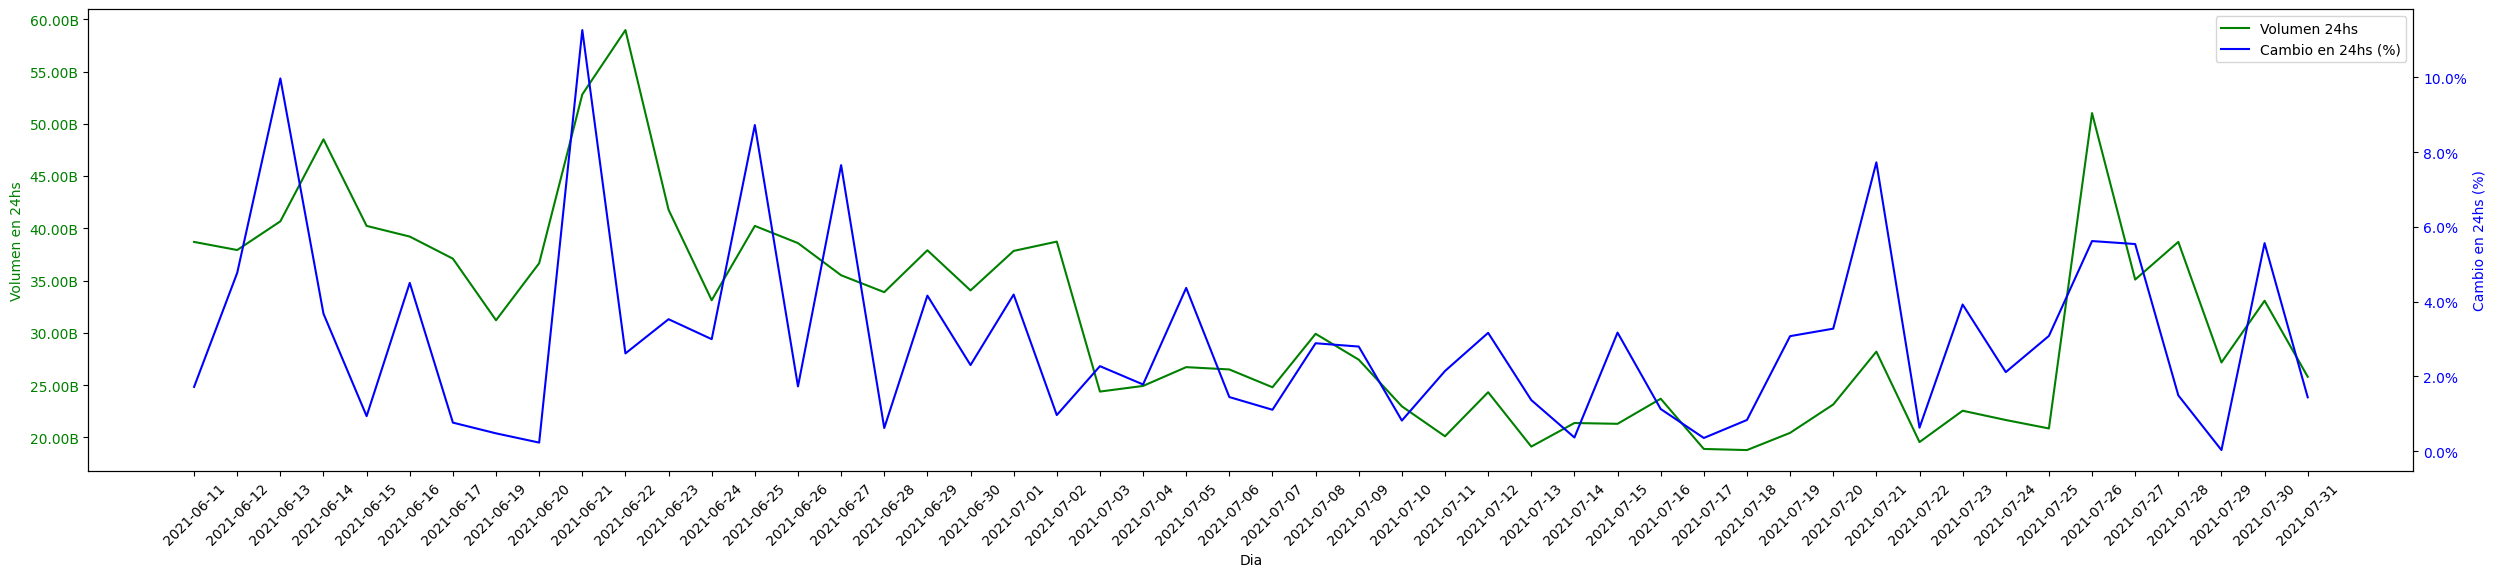

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter, FuncFormatter

btc_df = data[data['coin_id'] == 1]

ult_fechas = btc_df.tail(50) #ultimas 50 fechas de mi df
vol24 = btc_df['volume_24h'].tail(50) #respectivos volumenes tradeados en ese dia para esas fechas
chg24 = btc_df['percent_change_24h'].tail(50).abs() #respectivos cambios porcentuales para las fechas, defino todos
                                                    #absolutos porque me intesa el valor de cambio no la direccion que tomo el precio

fig, ax1 = plt.subplots(figsize=(30, 6)) #defino la figura

# convierto a string las fechas para ponerlas de label luego
dates = ult_fechas['date'].astype(str)

# Primer cordenada Y - a la izquierda - VOLUMEN
ax1.set_xlabel('Dia')
ax1.set_ylabel('Volumen en 24hs', color='green')
ax1.plot(dates, vol24, color='green', label='Volumen 24hs') #armo primera linea
ax1.tick_params(axis='y', labelcolor='green') #modifico estetica de los ticks

# reformateo los valores del volumen a millones definiendo funcion
def billones(x, pos):
    'The two args are the value and tick position'
    return '%.2fB' % (x * 1e-9)

# aplico formateo a primer ax
ax1.yaxis.set_major_formatter(FuncFormatter(billones))

# segunda coordenada Y - a la derecha - CAMBIO % en 24hs
ax2 = ax1.twinx() #agrego a la figura la segunda coordenada Y
ax2.set_ylabel('Cambio en 24hs (%)', color='blue')
ax2.plot(dates, chg24 / 100, color='blue', label='Cambio en 24hs (%)')

# formateo los valores a porcentaje
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))

ax2.tick_params(axis='y', labelcolor='blue')


ax1.set_xticks(range(len(dates))) #defino los ticks del eje x
ax1.set_xticklabels(dates, rotation=45) #roto los tiks del eje x para mejor visibilidad
lines, labels = ax1.get_legend_handles_labels() #defino las variables para las leyendas
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right') #agrego y ubico la leyenda

plt.show()

# 2) Impacto del market cap en el comportamiento del precio:

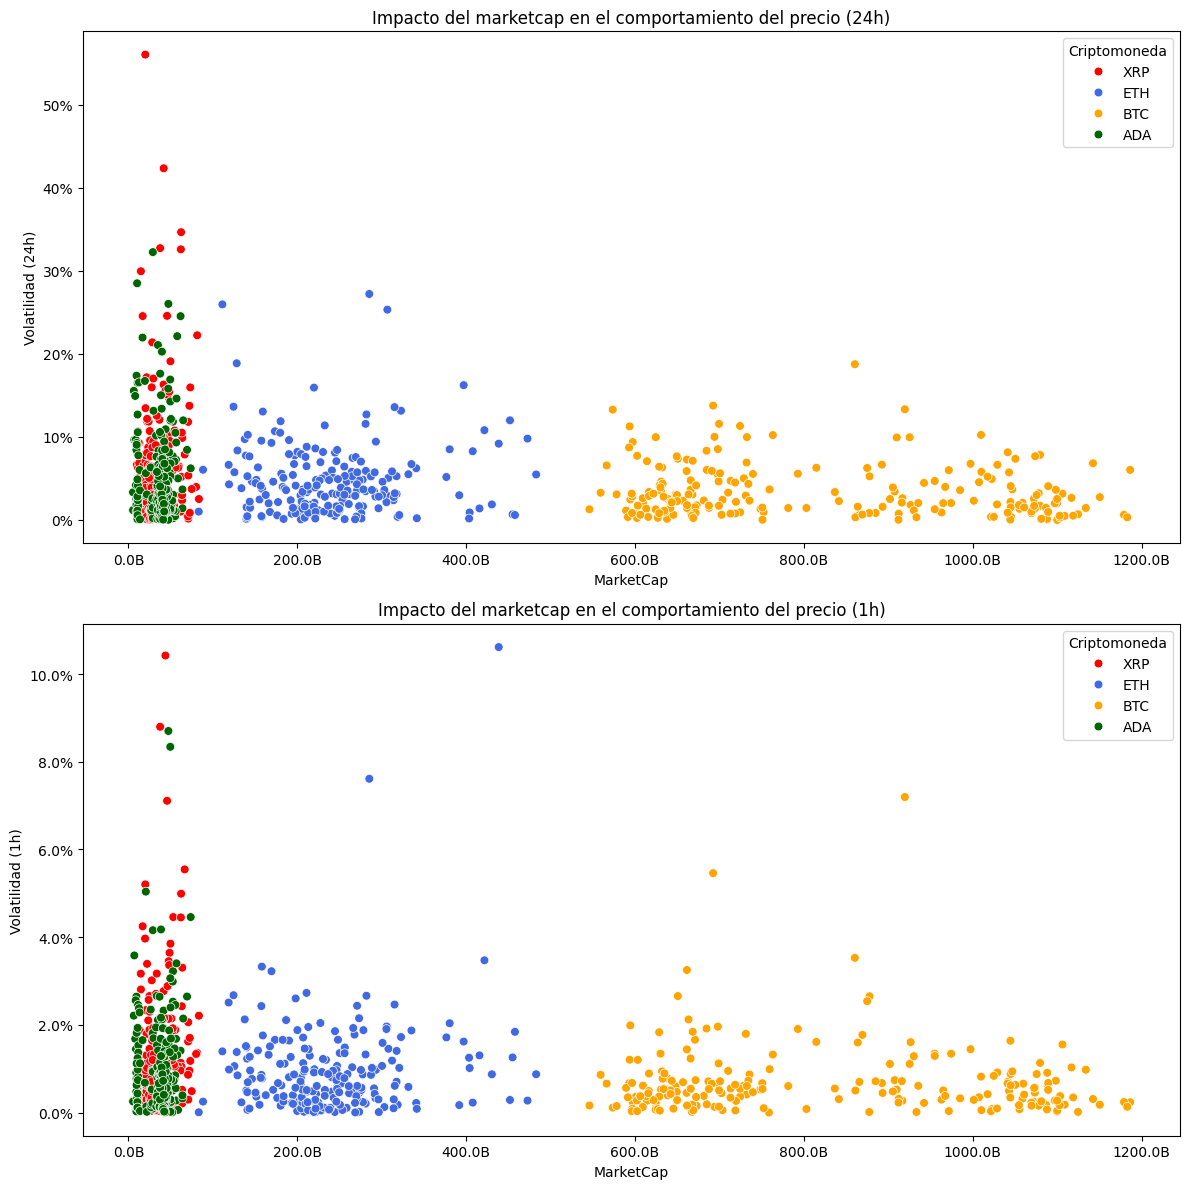

In [19]:
import seaborn as sns

xrp_df = data[data['coin_id'] == 52] #bajo marketcap
eth_df = data[data['coin_id'] == 1027] #alto marketcap
ada_df = data[data['coin_id'] == 2010] #bajo marketcap

dftest = pd.concat([xrp_df, eth_df, btc_df, ada_df]) #defino un dataframe con las 4 variables a evaluar

dftest['percent_change_24h'] = dftest['percent_change_24h'].abs() #convierto a valor absoluto los cambios en 24hs para no tener valores negativos de volatilidad (que solo indican la tendencia)
dftest['percent_change_1h'] = dftest['percent_change_1h'].abs()

dftest['date'] = pd.to_datetime(dftest['date']) #le doy formato de fecha a la columna fecha
dftest2 = dftest[dftest['date'].dt.year == 2021].copy() #filtro el dataframe para estudiar la hipotesis solo en el año 2021

coin_id_to_name = { #asigno nombre a las categorias
    1: 'BTC',
    1027: 'ETH',
    2010: 'ADA',
    52: 'XRP'
}
dftest2['coin_id'] = dftest2['coin_id'].map(coin_id_to_name) #mapeo los id a los nombres dados

palette = { #asigno colores para mejor diferenciacion
    'BTC': 'orange',
    'ETH': 'royalblue',
    'ADA': 'darkgreen',
    'XRP': 'red'
}

def billions(x, pos): #funcion para el formateo del eje X para mejor legilibilidad
    """ Convertir el valor a billones """
    return f'{x * 1e-9:.1f}B'

fig, axs = plt.subplots(2, 1, figsize=(12, 12)) #figura con 2 subplots verticales

# primer subplot: percent_change_24h
sns.scatterplot(data=dftest2, x='market_cap', y='percent_change_24h', hue='coin_id', s=40, palette=palette, ax=axs[0])
axs[0].xaxis.set_major_formatter(FuncFormatter(billions))
axs[0].yaxis.set_major_formatter(PercentFormatter())
axs[0].set_xlabel('MarketCap')
axs[0].set_ylabel('Volatilidad (24h)')
axs[0].set_title('Impacto del marketcap en el comportamiento del precio (24h)')
axs[0].legend(title='Criptomoneda')

# segundo subplot: percent_change_1h
sns.scatterplot(data=dftest2, x='market_cap', y='percent_change_1h', hue='coin_id', s=40, palette=palette, ax=axs[1])
axs[1].xaxis.set_major_formatter(FuncFormatter(billions))
axs[1].yaxis.set_major_formatter(PercentFormatter())
axs[1].set_xlabel('MarketCap')
axs[1].set_ylabel('Volatilidad (1h)')
axs[1].set_title('Impacto del marketcap en el comportamiento del precio (1h)')
axs[1].legend(title='Criptomoneda')

plt.tight_layout()
plt.show()

#3) Correlacion de los intervalos temporales 1h - 24hs - 7d

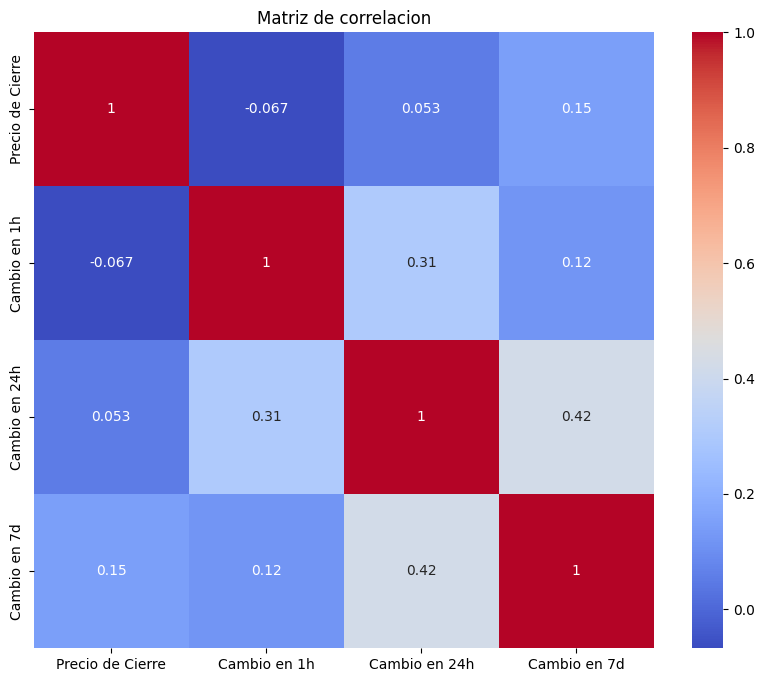

In [24]:
btc_df['date'] = pd.to_datetime(btc_df['date']) # Ensure 'date' is in datetime format

btc_df = btc_df.sort_values('date')

btc_df_2021 = btc_df[btc_df['date'].dt.year == 2021].copy() #filtro el dataframe para estudiar la hipotesis solo en el año 2021

btc_df_2021.rename(columns={
    'close': 'Precio de Cierre',
    'percent_change_1h': 'Cambio en 1h',
    'percent_change_24h': 'Cambio en 24h',
    'percent_change_7d': 'Cambio en 7d'
}, inplace=True)

# calculo la matriz de correlación
matriz_btc = btc_df_2021[['Precio de Cierre', 'Cambio en 1h', 'Cambio en 24h', 'Cambio en 7d']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_btc, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

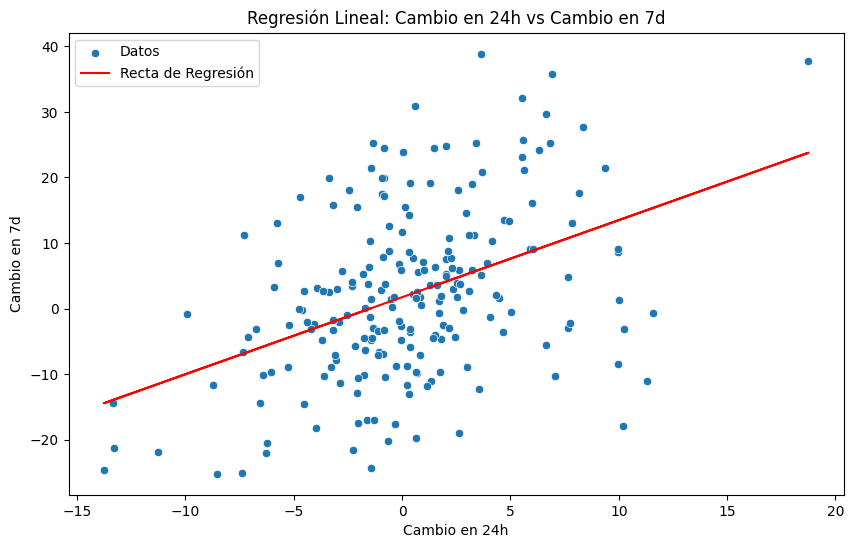

In [25]:
X = btc_df_2021['Cambio en 24h'].values
y = btc_df_2021['Cambio en 7d'].values

# Calcular la media de X y y
mean_X = np.mean(X)
mean_y = np.mean(y)

# Calcular los términos necesarios para la fórmula de los coeficientes
n = len(X)
numerator = sum((X - mean_X) * (y - mean_y))
denominator = sum((X - mean_X) ** 2)

# Calcular la pendiente (m) y el intercepto (b)
m = numerator / denominator
b = mean_y - (m * mean_X)

# Calcular los valores de y_pred para la línea de regresión
y_pred = m * X + b

# Graficar los puntos de datos y la línea de regresión
plt.figure(figsize=(10, 6))

# Scatterplot de los datos
sns.scatterplot(x=btc_df_2021['Cambio en 24h'], y=btc_df_2021['Cambio en 7d'], label='Datos')

# Línea de regresión
plt.plot(btc_df_2021['Cambio en 24h'], y_pred, color='red', label='Recta de Regresión')

# Etiquetas y título del gráfico
plt.xlabel('Cambio en 24h')
plt.ylabel('Cambio en 7d')
plt.title('Regresión Lineal: Cambio en 24h vs Cambio en 7d')
plt.legend()
plt.show()